# 데이터 관리 프로그램 만들기

## 1. 파일 시스템 활용
월급이 가장 높은 사원을 찾는 프로그램

### employeefile.txt
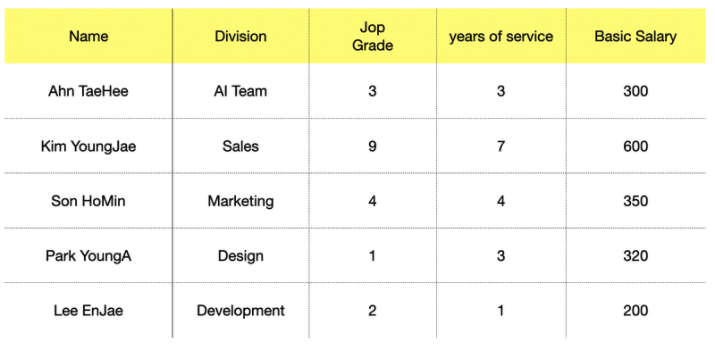

### Employee Class 설계

In [1]:
class Employee:
    # 인스턴스 변수
    def __init__ (self, name, division, jobgrade, years, basic):
        self.name = name
        self.division = division
        self.jobgrade = int(jobgrade)
        self.years = int(years)
        self.basic = float(basic)
        # salary 초깃값 설정
        self.salary = 0

    # 정보 접근자 메소드
    def get_name(self):
        return self.name
    def get_division(self):
        return self.division
    def get_jobgrade(self):
        return self.jobgrade
    def get_years(self):
        return self.years
    def get_basic(self):
        return self.basic

    # 급여 계산
    def get_salary(self):
        self.salary = self.basic + (self.basic * self.years * 0.1)
        return self.salary
    
# 텍스트 파일에서 불러온 각각의 데이터는 string으로 처리되므로 형 변환

### make_employee() 함수
파일을 읽어서 데이터의 값을 사용하여 자동으로 인스턴스 객체를 만들어 주는 함수

In [2]:
def make_employee(inputdata):
    name, division, jopgrade, year, basic = inputdata.split(',')
    return Employee(name, division, jopgrade, year, basic)

import os
file_path = os.getenv("HOME") + '/aiffel/data_handling/data/employeefile.txt'
print(file_path)
inputfile = open(file_path, 'r')

for i in inputfile:
    e = make_employee(i)

/aiffel/aiffel/data_handling/data/employeefile.txt


### 전체 코드

In [3]:
import os

class Employee:
    def __init__ (self, name, division, jobgrade, years, basic):
        self.name = name
        self.division = division
        self.jobgrade = int(jobgrade)
        self.years = int(years)
        self.basic = float(basic)
        self.salary = 0

    def get_name(self):
        return self.name

    def get_division(self):
        return self.division
    
    def get_jobgrade(self):
        return self.jobgrade
    
    def get_years(self):
        return self.years
    
    def get_basic(self):
        return self.basic

    def get_salary(self):
        self.salary = self.basic + (self.basic * self.years * 0.1)
        return self.salary

def make_employee(inputdata):
    name, division, jopgrade, year, basic = inputdata.split(',')
    return Employee(name, division, jopgrade, year, basic)

def summarize():
    file_path = os.getenv("HOME") + '/aiffel/data_handling/data/employeefile.txt'
    inputfile = open(file_path, 'r')
    highest = make_employee(inputfile.readline())
    for l in inputfile:
        e = make_employee(l)
        if e.get_salary() > highest.get_salary():
            highest = e
    inputfile.close()
    
    print("The name of the highest salary employee is: ", highest.get_name())
    print("Years of service: ", highest.get_years())
    print("Division: ", highest.get_division())
    print("Salay: ", highest.get_salary())

In [4]:
summarize()

The name of the highest salary employee is:  Kim YoungJae
Years of service:  7
Division:   Sales
Salay:  1020.0


## 2. Pandas와 csv 파일
Pandas를 이용하면 SQL과 유사한 기능을 수행할 수 있습니다.

### pd.merge()
merge() 메소드는 공통의 칼럼에 있는 값을 키로 사용해 데이터를 합쳐줍니다. 

on 인자에 키 값을 넣어 주어 공통 칼럼이 여러 개인 경우를 대비해 직접 값을 넣어줄 수 있으며, 키 값이 될 수 있는 필드가 1개더라도 명확한 코드를 작성하기 위해 키 값을 담은 컬럼(column)의 이름을 직접 나타내주면 좋습니다.

In [5]:
import pandas as pd

df1 = pd.DataFrame({'Student': ['KimTaemin','HaJaehwa','JungSayoung','Sonjimin','Leesoomin','KangJun'],
                    'Korean': [90, 85, 88, 35, 40, 44],
                    'English': [80, 90, 40, 44, 55, 90]})
df2 = pd.DataFrame({'Student': ['KimTaemin','HaJaehwa','JungSayoung','Sonjimin','Leesoomin','KangJun'],
                    'Math': [100, 55, 38, 43, 68, 82]})

print(df1)
print('---')
print(df2)

       Student  Korean  English
0    KimTaemin      90       80
1     HaJaehwa      85       90
2  JungSayoung      88       40
3     Sonjimin      35       44
4    Leesoomin      40       55
5      KangJun      44       90
---
       Student  Math
0    KimTaemin   100
1     HaJaehwa    55
2  JungSayoung    38
3     Sonjimin    43
4    Leesoomin    68
5      KangJun    82


In [6]:
# Student라는 공통 키가 있으므로 on 인자가 없어도 자동으로 Student로 합쳐짐
pd.merge(df1, df2)

,Student,Korean,English,Math
0,KimTaemin,90,80,100
1,HaJaehwa,85,90,55
2,JungSayoung,88,40,38
3,Sonjimin,35,44,43
4,Leesoomin,40,55,68
5,KangJun,44,90,82


In [7]:
# 겹치는 행이 일부만 있는 경우
df1 = pd.DataFrame({'Student': ['KimTaemin','HaJaehwa','JungSayoung','Sonjimin','Leesoomin','KangJun'],
                    'Korean': [90, 85, 88, 35, 40, 44],
                    'English': [80, 90, 40, 44, 55, 90]})
df2 = pd.DataFrame({'Student': ['Jiyoungmin','KimTaemin'],
                    'Math':[44,33]})

print(df1)
print('---')
print(df2)

       Student  Korean  English
0    KimTaemin      90       80
1     HaJaehwa      85       90
2  JungSayoung      88       40
3     Sonjimin      35       44
4    Leesoomin      40       55
5      KangJun      44       90
---
      Student  Math
0  Jiyoungmin    44
1   KimTaemin    33


In [8]:
# 공통된 데이터만 합치는 inner join (how의 기본값은 inner)
pd.merge(df1, df2, how='inner')

,Student,Korean,English,Math
0,KimTaemin,90,80,33


In [9]:
# outer join은 전체 데이터에 합치는 연산
pd.merge(df1, df2, how='outer')

,Student,Korean,English,Math
0,KimTaemin,90.0,80.0,33.0
1,HaJaehwa,85.0,90.0,NaN
2,JungSayoung,88.0,40.0,NaN
3,Sonjimin,35.0,44.0,NaN
4,Leesoomin,40.0,55.0,NaN
5,KangJun,44.0,90.0,NaN
6,Jiyoungmin,NaN,NaN,44.0


### df.join()

In [10]:
# '_caller'인 df1 컬럼이 왼쪽에 가도록 배치
df1.join(df2, how='outer', lsuffix='_caller', rsuffix='_other')

,Student_caller,Korean,English,Student_other,Math
0,KimTaemin,90,80,Jiyoungmin,44.0
1,HaJaehwa,85,90,KimTaemin,33.0
2,JungSayoung,88,40,NaN,NaN
3,Sonjimin,35,44,NaN,NaN
4,Leesoomin,40,55,NaN,NaN
5,KangJun,44,90,NaN,NaN


### df.concat()
데이터를 합치는 또 다른 방법으로 이어 붙이기가 있습니다. 적층 또는 연결이라고 표현하기도 합니다. 
df.concat의 파라미터 axis를 1로 지정하면 column 방향으로 합치는 것이 가능합니다.

In [11]:
df1 = pd.DataFrame({'Student': ['KimTaemin','HaJaehwa','JungSayoung','Sonjimin','Leesoomin','KangJun'],
                    'Korean': [90, 85, 88, 35, 40, 44],
                    'English': [80, 90, 40, 44, 55, 90]})
df2 = pd.DataFrame({'Student': ['Jiyoungmin','LeeJae','KimJaehee'],
                    'Korean': [44,73,100]})

print(df1)
print(df2)

       Student  Korean  English
0    KimTaemin      90       80
1     HaJaehwa      85       90
2  JungSayoung      88       40
3     Sonjimin      35       44
4    Leesoomin      40       55
5      KangJun      44       90
      Student  Korean
0  Jiyoungmin      44
1      LeeJae      73
2   KimJaehee     100


In [12]:
pd.concat([df1,df2], sort=False)

,Student,Korean,English
0,KimTaemin,90,80.0
1,HaJaehwa,85,90.0
2,JungSayoung,88,40.0
3,Sonjimin,35,44.0
4,Leesoomin,40,55.0
5,KangJun,44,90.0
0,Jiyoungmin,44,NaN
1,LeeJae,73,NaN
2,KimJaehee,100,NaN


In [13]:
# 인덱스 초기화
pd.concat([df1, df2], sort=False, ignore_index=True)

,Student,Korean,English
0,KimTaemin,90,80.0
1,HaJaehwa,85,90.0
2,JungSayoung,88,40.0
3,Sonjimin,35,44.0
4,Leesoomin,40,55.0
5,KangJun,44,90.0
6,Jiyoungmin,44,NaN
7,LeeJae,73,NaN
8,KimJaehee,100,NaN


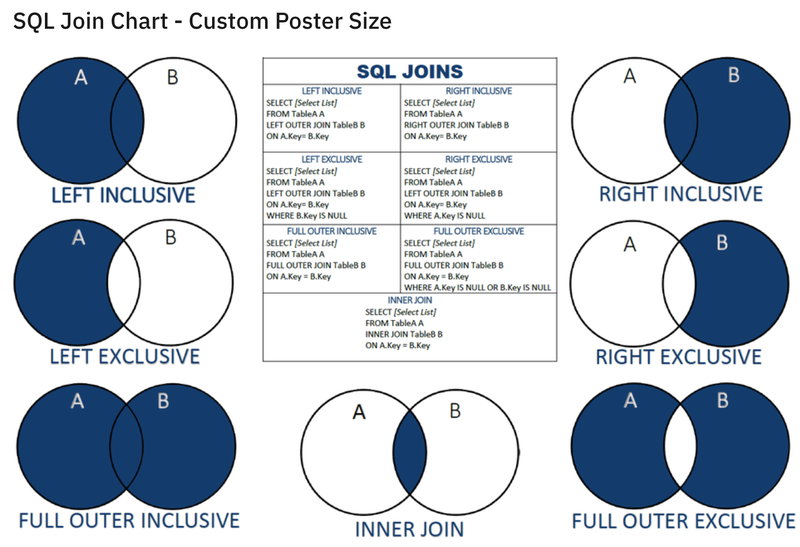
https://www.reddit.com/r/SQL/comments/aysflk/sql_join_chart_custom_poster_size/

## 3. Pandas의 유용한 기능들

### 필터링 연산

In [14]:
df = pd.DataFrame({"A": [1,4,7], "B": [2,5,8], "C":[3,6,9]})

df

,A,B,C
0,1,2,3
1,4,5,6
2,7,8,9


#### 1. df'컬럼 명' 형식

In [15]:
df['A']

0    1
1    4
2    7
Name: A, dtype: int64

#### 2. loc() 사용
loc()은 라벨 을 사용하여 행 또는 열(컬럼)을 지정, 데이터를 추출합니다.  
**df.loc[[행],[열]]**

In [16]:
print(df.loc[0])

A    1
B    2
C    3
Name: 0, dtype: int64


In [17]:
print(df.loc[0, 'B'])

2


In [18]:
# loc는 리스트의 슬라이스 연산과 비슷한 부분도 있습니다.
print(df.loc[1:, 'C'])

1    6
2    9
Name: C, dtype: int64


#### 3. iloc() 사용
iloc()은 정수 인덱스 를 사용하여 행 또는 열(컬럼)을 지정, 데이터를 추출합니다.  
**df.iloc[[행],[열]]**

In [19]:
print(df.iloc[0])

A    1
B    2
C    3
Name: 0, dtype: int64


In [20]:
print(df.iloc[:, 0])

0    1
1    4
2    7
Name: A, dtype: int64


In [21]:
# 컬럼 이름을 주면 에러
print(df.iloc[0, 'B'])

ValueError: Location based indexing can only have [integer, integer slice (START point is INCLUDED, END point is EXCLUDED), listlike of integers, boolean array] types

In [22]:
print(df.iloc[0, 1])

2


값을 선택하거나 데이터를 정렬할 때 기준이 되는 값을 키(key)라고 부릅니다.  
일반적인 데이터베이스에서는 이 키 값에 따라 그룹을 묶은(grouping) 뒤 원하는 연산을 수행할 수 있습니다.

Pandas에서는 groupby() 연산이라고 합니다.

#### 4. groupby()

In [23]:
df = pd.DataFrame({'Columns1':['A','A','B','B','C','C','A','B'],
                   'Columns2':[10, 2, 30, -6, 8, 9, 5, 2]})

df

,Columns1,Columns2
0,A,10
1,A,2
2,B,30
3,B,-6
4,C,8
5,C,9
6,A,5
7,B,2


- groupby() 객체를 생성
- groupby() 객체의 연산을 수행
  - max(), min(), sum(), mean()
  - apply() 메소드를 통해 특수 수식에 대한 연산을 수행할 수 있습니다.

In [24]:
# apply()
import numpy as  np
df.groupby(['Columns1']).max().apply(np.sqrt)

,Columns2
Columns1,
A,3.162278
B,5.477226
C,3.000000


## 4. Pandas Transform 실전
**SF 임금 예제**  
직원 임금 관리 프로그램  
https://anaconda.org/gwinnen/sf-salaries-exercise/notebook

In [25]:
# 데이터
import pandas as pd
import numpy as np
import os

file_path = os.getenv("HOME") + '/aiffel/data_handling/data/Salaries.csv'
sal = pd.read_csv(file_path)

sal.head(5)

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [26]:
sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148645 entries, 0 to 148644
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148645 non-null  int64  
 1   EmployeeName      148645 non-null  object 
 2   JobTitle          148645 non-null  object 
 3   BasePay           148040 non-null  float64
 4   OvertimePay       148645 non-null  float64
 5   OtherPay          148645 non-null  float64
 6   Benefits          112486 non-null  float64
 7   TotalPay          148645 non-null  float64
 8   TotalPayBenefits  148645 non-null  float64
 9   Year              148645 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148645 non-null  object 
 12  Status            38114 non-null   object 
dtypes: float64(7), int64(2), object(4)
memory usage: 14.7+ MB


In [27]:
# 평균 basepay
sal['BasePay'].mean()

66327.68895967308

In [28]:
# 최대 OvertimePay
sal['OvertimePay'].max()

245131.88

In [29]:
# JOSEPH DRISCOLL의 job title
sal[sal['EmployeeName'] == 'JOSEPH DRISCOLL']['JobTitle']

24    CAPTAIN, FIRE SUPPRESSION
Name: JobTitle, dtype: object

In [30]:
# JOSEPH DRISCOLL의 급여(benefits 포함)
sal[sal['EmployeeName'] == 'JOSEPH DRISCOLL']['TotalPayBenefits']

24    270324.91
Name: TotalPayBenefits, dtype: float64

In [31]:
# 월급(Benefit포함) 이 가장 높은 사람
sal[sal['TotalPayBenefits'] == sal['TotalPayBenefits'].max()]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN


In [32]:
# 월급(Benefit포함) 이 가장 낮은 사람
sal[sal['TotalPayBenefits'] == sal['TotalPayBenefits'].min()]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
110530,110531,David P Kucia,Police Officer 3,NaN,0.0,0.0,-33.89,0.0,-33.89,2013,NaN,San Francisco,NaN


In [33]:
# 2011~2014년 동안의 연도별 BasePay의 평균
sal.groupby('Year').mean()['BasePay']

Year
2011    63595.956517
2012    65436.406857
2013    69630.030216
2014    66573.154204
Name: BasePay, dtype: float64

In [34]:
# Job Title의 종류
sal['JobTitle'].nunique()

2158

In [35]:
# Job Title중 가장 많은 상위 5개
sal['JobTitle'].value_counts().head(5)

Transit Operator                7036
Special Nurse                   4389
Registered Nurse                3736
Public Svc Aide-Public Works    2518
Police Officer 3                2421
Name: JobTitle, dtype: int64

In [36]:
# Chief 란 단어를 갖는 Job Title은 몇 개
import re

def chief_string(title):
    title_pre = re.sub(r"([?.!,])", r" \\\\1", title).lower()
    if 'chief' in title_pre.split():
        return True
    else:
        return False
    
print(sal['JobTitle'].apply(lambda x: chief_string(x)).sum())

627


## 5. SQL
SQL(Structured Query Language)

SQL은 데이터 연산 작업이 가능한, "쿼리(query)를 위한 언어"입니다.

SQL은 결과를 질의하는 언어의 형태를 띠고 있다는 점이 특별합니다. 

### SQL문 종류
- DDL(Data Definition Language, 데이터 정의어)
테이블이나 관계의 구조를 생성하는 데 사용합니다.  
테이블, 데이터베이스, 사용자에 대한 생성, 삭제 제약조건(constraint), 권한(permission)을 설정합니다.
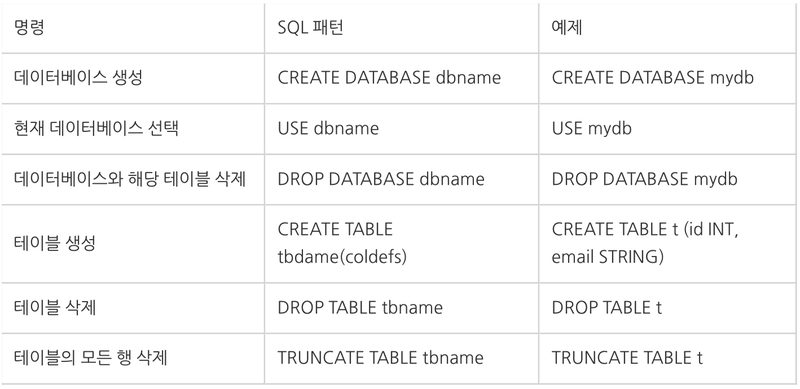
  
  
- DML(Data Manipulation Language, 데이터 조작어)
테이블의 데이터를 조회, 삽입, 갱신, 삭제할 때 사용합니다.  
이때 이런 데이터의 기본 조작 행위를 CRUD라고 줄여서 부릅니다.
  - 생성(Create): INSERT 문 사용
  - 조회(Read): SELECT 문 사용
  - 갱신(Update): UPDATE 문 사용
  - 삭제(Delete): DELETE 문 사용
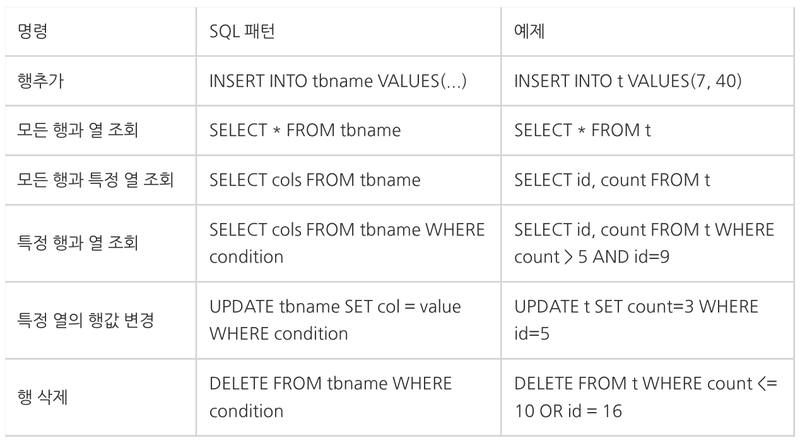

## 6. 파이썬으로 데이터베이스 다루기
### 파이썬 DB-API
파이썬 인터프리터는 데이터베이스를 바로 사용할 수 있도록 표준 API를 지원합니다.  
PEP249: https://www.python.org/dev/peps/pep-0249/  
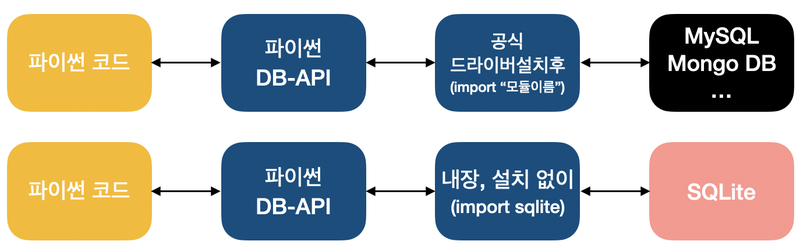

### API 메인 함수
- connect(): 데이터베이스의 연결을 만든다.
- cursor(): 질의를 관리하기 위한 커서 객체를 만든다. (file의 open과 비슷)
- execute(), excutemany(): 데이터베이스에 하나 이상의 SQL명령을 실행한다.
- fetchone(), fetchmany(), fetchall(): 실행 결과를 얻는다.


### 파이썬 튜토리얼
https://docs.python.org/3.7/library/sqlite3.html

#### 연결: connect()
데이터베이스와 연결합니다.
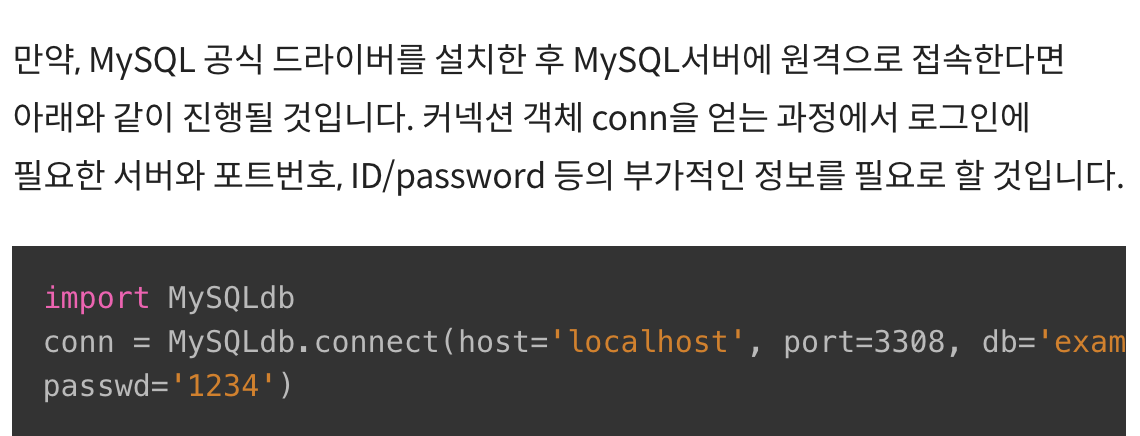

In [41]:
import sqlite3
conn = sqlite3.connect('example.db')

#### 커서 객체 만들기: cursor()
데이터베이스와 연결했으면 커서 객체를 만들어 줍니다.

In [42]:
c = conn.cursor()

#### 쿼리 명령어: execute(), executemany()


In [45]:
# Create table
c.execute('''CREATE TABLE stocks(date text, trans text, symbol text, qty real, price real)''')

# Insert a row of data
c.execute("INSERT INTO stocks VALUES ('2006-01-05','BUY','RHAT',100,35.14)")

OperationalError: table stocks already exists

#### 데이터베이스에 반영: commit()
쿼리 명령어를 데이터베이스에 반영하기 위해선 꼭 commit() 함수를 써주어야 해요.

In [44]:
conn.commit()

#### 종료: close()
데이터베이스 관련 작업이 끝나면 종료를 해주세요. 파일 객체를 종료하는 것과 비슷합니다.

In [46]:
conn.close()

### DB-API 구현


In [47]:
import sqlite3

# 메모리에 SQLite3 데이터베이스를 만든다.
conn = sqlite3.connect(':memory:')
# 4가지 속성을 지닌 sales 테이블 생성
query = """CREATE TABLE sales
            (product VARCHAR(20),
            maker VARCHAR(40),
            amount FLOAT,
            date DATE);"""
conn.execute(query)
conn.commit()

# sales 테이블에 데이터를 삽입
data = [('smart phone', 'Apple', '47.2', '2019-08-03'),
        ('printer', 'Samsung', '15.2', '2018-02-10',),
        ('monitor', 'LG', '14.25', '2019-12-20'),
        ('python book', 'Amazon', '12.40', '2020-01-23')]
statement = "INSERT INTO sales VALUES(?, ?, ?, ?)"
conn.executemany(statement, data)
conn.commit()

# sales 테이블에 질의
cursor = conn.execute("SELECT * FROM sales")
rows = cursor.fetchall()

# 출력 데이터의 개수를 샌다.
row_counter = 0
for row in rows:
    print(row)
    row_counter +=1

print("Number of rows: {}".format(row_counter))

('smart phone', 'Apple', 47.2, '2019-08-03')
('printer', 'Samsung', 15.2, '2018-02-10')
('monitor', 'LG', 14.25, '2019-12-20')
('python book', 'Amazon', 12.4, '2020-01-23')
Number of rows: 4
